---------------------------------------------------------------------------
**Table of Contents**
---------------------------------------------------------------------------
1.Introduction
2.Problem Statement
3.Installing & Importing Libraries
  3.1 Installing Libraries
  3.2 Upgrading Libraries
  3.3 Importing Libraries
4.Data Acquisition & Description
5.Data Pre-Profiling
6.Data Pre-Processing
7.Data Post-Profiling
8.Exploratory Data Analysis
9.Summarization
  9.1 Conclusion
  9.2 Actionable Insights 


1. **Introduction**
---------------------------------------------------------------------------

* IMDb (an abbreviation of Internet Movie Database)[2] is an online database of information related to films, television series, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. 

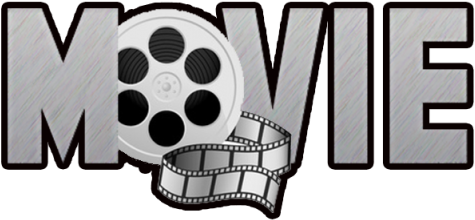
* IMDb began as a fan-operated movie database on the Usenet group "rec.arts.movies" in 1990, and moved to the web in 1993. It is now owned and operated by IMDb.com, Inc., a subsidiary of Amazon.

* The IMDb Top 250 is a list of the top rated 250 films, based on ratings by the registered users of the website using the methods described

* The "Top 250" rating is based on only the ratings of "regular voters". The number of votes a registered user would have to make to be considered as a user who votes regularly has been kept secret.







**2. Problem Statement**
---------------------------------------------------------------------------
*  In last few years, the film industry has become more popular than ever.
*  In 2018, movies made total income around $ 41.7 billion throughout the world.
*  We will provide insight on which Genre movie has earned more revenues? 
*   How much does a director matter?


In [ ]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
# To install more libraries insert your code here..

     |████████████████████████████████| 69 kB 6.8 MB/s 


In [ ]:
!pip install -q --upgrade pandas-profiling                          # Upgrading pandas profiling to the latest version

     |████████████████████████████████| 261 kB 24.2 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 102 kB 11.1 MB/s 
     |████████████████████████████████| 303 kB 65.9 MB/s 
     |████████████████████████████████| 3.1 MB 55.5 MB/s 
     |████████████████████████████████| 596 kB 56.5 MB/s 
     |████████████████████████████████| 10.9 MB 55.6 MB/s 
     |████████████████████████████████| 675 kB 57.0 MB/s 
     |████████████████████████████████| 812 kB 57.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                  
import missingno as msno                                # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------

Data Acquistion & Data Description
1.   This section is emphasised on the accquiring the data and obtain some descriptive information:


--------------------------------------------------------------------------------

                 |id|   Feature    | Description|
--------------------------------------------------------------------------------
                 |01|  Rank      |Movie Rank
                 |02| Title      |Title of the movie|
                 |03| Genre      |The various Genre like Action/Drama/Sci-Fi |
                 |04| Description|Short intro of the movie|
                 |05| Director   |Director name|
                 |06| Actors     |Main Star cast| 
                 |07| Year       |Movie Released |
                 |08|Runtime(minutes)|Duration |
                 |09|Rating      |Movie rating|
                 |10|Revenue(Millions)|Revenue by the movie(in millions)|
                 |11|Metascore   |Score given by the metacritic website by critics|



In [ ]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv')
print('Shape of the dataset:', data.shape)
data.head()


Shape of the dataset: (1000, 12)


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


4.1  ** Data Description**
1.   In this section we will get information about the data and see some observations.


In [ ]:
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


**Observation**
1.   The average rating of movie is 6.7 and of avg runtime of 113 mins
2.   Maximum revenue earned was in year 2016  by the movies is 936.630 Millions 
3.   Minimum revenue earned is 0.0 and recevied  6.1 votes with Metascore rating of 11 which need to be investigated
4.   Approx  25 % Movies released during 2014-16 have earned revenue from 47 to 113 millions revenues
5.   Average  metascore of 58 with 82 million revenue earned in 2021 
6.   Average votes for the movies is 1.6 .


4.2 **Data Information**
1.   In this section we will see the information about the types of features.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


**Observations**
1.   There are 12 featues with 1000 records
2.   Year,Runtime & Votes are of int64 type
3.   Rating is of float64 type 
4.   Title,Genre,Desc,Director& Actors are of object type
5.   We have to make more senses on Revenues earned & Year of the movies 


5**. Data Pre-Profiling**

1.   This section is emphasised on getting a report about the data.
2.   You need to perform pandas profiling and get some observations out of it...


In [ ]:
profile = ProfileReport(df =data)
profile.to_file(output_file = 'Pre Profiling Report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Observations**

1. We have  7 numerical & 5 categorical features 
2.  We have high missing values in Revenues & metascore columns 
3.  Title and  has high cardinality distinct values
4.  Description & Rank  has unique values 
5.  No Duplicates row  found in the dataset 
6.   Revenue (Millions) is highly correlated with Votes
7.   Votes is highly correlated with Year and 2 other fields
8.   Description has a high cardinality: 1000 distinct values












**6. Data Pre-Processing**
---------------------------------------------------------------------------
*   This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

*   To modify unstructured data to strucuted data you need to verify and manipulate the integrity of the data by:
      

    *   Handling missing data,
    *   Handling redundant data,
    *   Handling inconsistent data,
    *   Handling outliers,
    *   Handling typos
   

**Data Cleaning**
1.   In this section, we will perform the cleaning operations over the features using information from the previous section.
2.   We will simply drop the rows that contain missing values.


In [ ]:
new_data = data.dropna(axis =0 , how = 'any')
print("Old data frame length:", len(data))
print("New data frame length:", len(new_data)) 
print("Number of rows with at least 1 NA value: ",
      (len(data)-len(new_data)))
new_data.head()

Old data frame length: 1000
New data frame length: 838
Number of rows with at least 1 NA value:  162


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


**Observations**
1.   We removed  162 missing items from the data


**7. Data Post-Profiling**
---------------------------------------------------------------------------
1.   This section is emphasised on getting a report about the data after the data manipulation.
2.   You may end up observing some new changes, so keep it under check and make right observations.


In [ ]:
profile = ProfileReport(df = new_data)
profile.to_file(output_file = 'Post Profiling Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


**Observations**
1.   No missing values in the dataset
2.   Rank is highly correlated with df_index
3.   Year is highly correlated with Votes



**8. Exploratory Data Analysis**
---------------------------------------------------------------------------
*   This section is emphasised on asking the right questions and perform analysis using the data.
*   Note that there is no limit how deep you can go, but make sure not to get distracted from right track.



Questions 
*   To Obtain the  unique values across the dataset for all columns and max & 
minimum ratings 

In [ ]:
df = new_data.nunique (axis=0, dropna=True) 
print("No.of.unique values in each column :\n",df) 
column = new_data["Rating"] 
max_value = column.max()
min_value = column.min() 
print(max_value)
print(min_value)

No.of.unique values in each column :
 Rank                  838
Title                 837
Genre                 189
Description           838
Director              524
Actors                834
Year                   11
Runtime (Minutes)      90
Rating                 50
Votes                 837
Revenue (Millions)    789
Metascore              82
dtype: int64
9.0
1.9


**Observation**
1.   Maximum  rating is 9.0 and minimum rating is 1.9 overall 


**Question**
1.   To find out how well movies are liked & disliked ? 


In [ ]:
data['Rating'].value_counts()

7.1    52
6.7    48
7.0    46
6.3    44
6.6    42
7.2    42
7.3    42
6.5    40
7.8    40
6.2    37
6.8    37
7.5    35
6.4    35
7.4    33
6.9    31
6.1    31
7.6    27
7.7    27
5.8    26
6.0    26
8.1    26
7.9    23
5.7    21
8.0    19
5.9    19
5.6    17
5.5    14
5.3    12
5.4    12
5.2    11
8.2    10
4.9     7
8.3     7
4.7     6
8.5     6
4.6     5
5.1     5
5.0     4
4.8     4
4.3     4
8.4     4
3.9     3
8.6     3
8.8     2
2.7     2
4.2     2
3.5     2
3.7     2
9.0     1
3.2     1
4.0     1
4.5     1
4.4     1
4.1     1
1.9     1
Name: Rating, dtype: int64

**Observations**
1.   Here we see that Rating score of 7.1 was given for maximum of 52 times!


A histogram will show you the distribution and the describe() method will give additional basic statistics. Both of them are quite helpful to get quick insights

In [ ]:
data['Rating'].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: Rating, dtype: float64

**Observations**
1.   Average Rating is around 6.7 
2.   More than 25% have rating above 7.4 
3.   50 % people have an voted above average rating 


Next, let’s look at a visual representation of the data by creating a histogram:

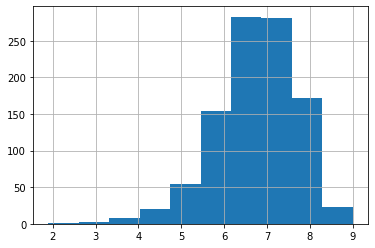

In [ ]:
data['Rating'].hist(bins=10)

**Observations**
1.   We have observed that it is skewed little to the left 
2.   Clearly shows that  movies are liked by most of the critics 


**Question**
1.   Display Frequency of Rating Barplot


In [ ]:
def plotBarChart(data=None, column=None, xlabel=None):
  """Creates bar chart depicting frequency distribution of categorical features."""

  # Create a figure size of 15 X 7 inches.
  figure = plt.figure(figsize=[15, 7])

  # Using pandas .plot.bar() function for barplot
  data[column].value_counts().plot.bar()

  # Changning x-ticks to 0 degree
  plt.xticks(rotation=0)

  # Set x, y labels of size 14 and title label of size 16.
  plt.xlabel(xlabel=xlabel, size=14)
  plt.ylabel(ylabel='Frequency', size=14)
  plt.title(label='Frequency Distribution of '+column, size=16)

  # Display the output
  plt.show()

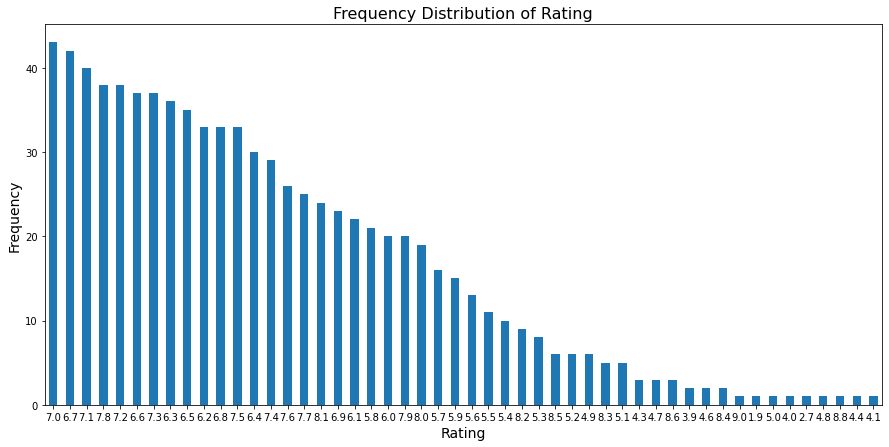

In [ ]:
plotBarChart(data=new_data, column='Rating', xlabel='Rating')

**Observations**
1.   40 plus movies have  rating of 7.0
2.   Below  5  movies have 8.8 ratings 
3.   Less then  20 movies have 8 plus ratings 
4.   Maximum movies have on an average of ratings of 5.5 to 7.0 



**Questions**
1.   How to  analyses the  Voters & Rating pattern of all the movies released?


In [ ]:
def plotScatterChart(data=None, xaxis=None, yaxis=None,):
  """Creates scatter chart of two numerical features."""

  # Using pandas .plot.scatter() function
  data.plot.scatter(x=xaxis, y=yaxis, figsize=[15, 7])

  # Set x, y labels of size 14 and title label of size 16.
  plt.xlabel(xlabel=xaxis, size=14)
  plt.ylabel(ylabel=yaxis, size=14)
  plt.title(label='Scatter Distribution of '+xaxis+' & '+yaxis, size=16)

  # Display the output
  plt.show()

In [ ]:
new_data.head(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


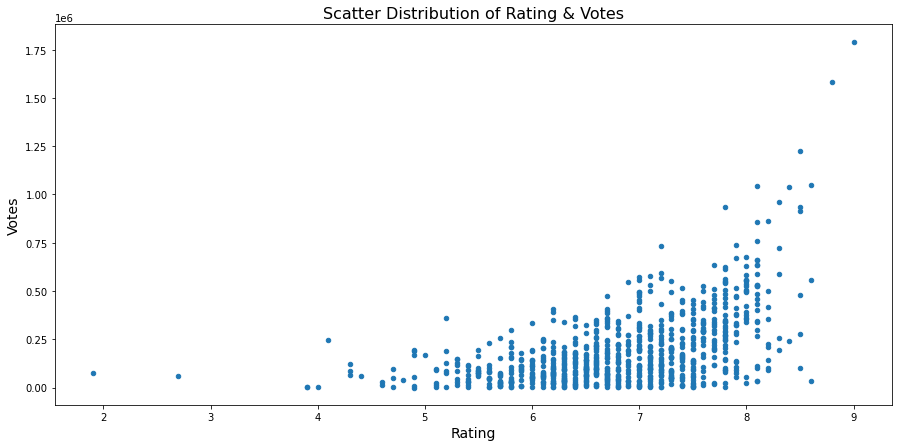

In [ ]:
plotScatterChart(data=new_data, xaxis='Rating', yaxis='Votes')

**Observations**
1.   Highest rating of 9 got around 1.75 lakh votes
2.   Major chunks of Movies rating from 5 to 8 received max 75K votes overall
3.   Below 25K votes on few movies whose rating are below 2 star.




**RunTime Analysis**
Question:  Frequency distribution of movies with the runtime duration?


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


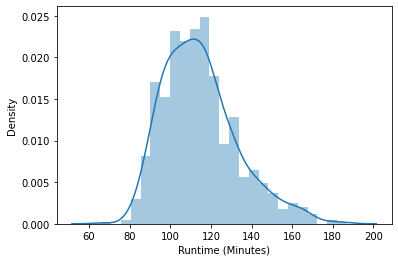

In [ ]:
#plt.hist(new_data['Runtime (Minutes)'])  # 10 bins by default

# Runtime histogram/density plot
sns.distplot(new_data['Runtime (Minutes)'])
plt.show()

**Observations**

1.   Average movies duration lies between 100-120 minutes 


**Questions**
1.   List  top 10 profitable movies from 2006-2016?
2.  



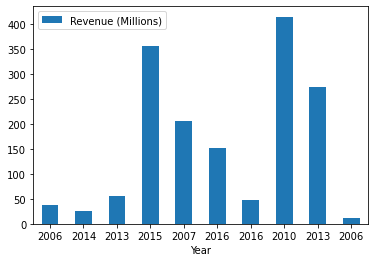

In [ ]:
# Get the top 10 profitable movies by using position based indexing. Specify the rows till 10 (0-9)
top10=new_data.iloc[0:10]
top10
ax = top10.plot.bar(x='Year', y='Revenue (Millions)', rot=0)



#Find the movies with 0 Revenue Earned ?


In [ ]:
neg_revenue = new_data[new_data["Revenue (Millions)"]==0]
neg_revenue

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
231,232,A Kind of Murder,"Crime,Drama,Thriller","In 1960s New York, Walter Stackhouse is a succ...",Andy Goddard,"Patrick Wilson, Jessica Biel, Haley Bennett, V...",2016,95,5.2,3305,0.0,50.0


**Observations**
1.   The Movie 'A kind of Murder ' has zero Revenue with a metascore of 50.0 



**Question:To Find out the highest rated movies which have been liked by critics and audiences alike.**
1.   Create a new column Avg_rating which will have the average of the MetaCritic and Rating columns
2.   Retain only the movies in which the absolute difference(using abs() function) between the rating and Metascore columns is less than 0.5 
3.   Sort these values in a descending order of Avg_rating and retain only the movies with a rating equal to higher than 8 and store these movies in a new dataframe UniversalAcclaim.


In [ ]:
new_data.Metascore.isnull().sum()

0

In [ ]:
new_data.Rating.isnull().sum()

0

In [ ]:
new_data.Metascore=new_data.Metascore.fillna(0)
new_data.Metascore.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0

In [ ]:
#First convert the Metascore column to a scale of 10.
new_data["Metascore"]=new_data["Metascore"]*0.10
new_data["Metascore"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0      7.6
1      6.5
2      6.2
3      5.9
4      4.0
      ... 
993    3.7
994    4.8
996    4.6
997    5.0
999    1.1
Name: Metascore, Length: 838, dtype: float64

In [ ]:
# Find the average ratings
new_data["Avg_rating"]=(new_data["Metascore"]+new_data["Rating"])/2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Sort in descending order of average rating
new_data.sort_values(by="Avg_rating", ascending=False,inplace=True)
new_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Avg_rating
230,231,Pan's Labyrinth,"Drama,Fantasy,War","In the falangist Spain of 1944, the bookish yo...",Guillermo del Toro,"Ivana Baquero, Ariadna Gil, Sergi López,Maribe...",2006,118,8.2,498879,37.62,9.8,9.00
656,657,Boyhood,Drama,"The life of Mason, from early childhood to his...",Richard Linklater,"Ellar Coltrane, Patricia Arquette, Ethan Hawke...",2014,165,7.9,286722,25.36,10.0,8.95
111,112,12 Years a Slave,"Biography,Drama,History","In the antebellum United States, Solomon North...",Steve McQueen,"Chiwetel Ejiofor, Michael Kenneth Williams, Mi...",2013,134,8.1,486338,56.67,9.6,8.85
241,242,Inside Out,"Animation,Adventure,Comedy",After young Riley is uprooted from her Midwest...,Pete Docter,"Amy Poehler, Bill Hader, Lewis Black, Mindy Ka...",2015,95,8.2,416689,356.45,9.4,8.80
489,490,Ratatouille,"Animation,Comedy,Family",A rat who can cook makes an unusual alliance w...,Brad Bird,"Brad Garrett, Lou Romano, Patton Oswalt,Ian Holm",2007,111,8.0,504039,206.44,9.6,8.80


**Question: Find the movies with metascore-rating < 0.5 and also with the average rating of >8**


In [ ]:
UniversalAcclaim=new_data[(round(abs(new_data["Metascore"]-new_data["Rating"]),2)<0.5)&(new_data["Avg_rating"]>8)]
UniversalAcclaim

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Avg_rating
476,477,The Lives of Others,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,8.9,8.70
133,134,Whiplash,"Drama,Music",A promising young drummer enrolls at a cut-thr...,Damien Chazelle,"Miles Teller, J.K. Simmons, Melissa Benoist, P...",2014,107,8.5,477276,13.09,8.8,8.65
99,100,The Departed,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,132.37,8.5,8.50
143,144,Room,Drama,A young boy is raised within the confines of a...,Lenny Abrahamson,"Brie Larson, Jacob Tremblay, Sean Bridgers,Wen...",2015,118,8.2,224132,14.68,8.6,8.40
427,428,The Bourne Ultimatum,"Action,Mystery,Thriller",Jason Bourne dodges a ruthless CIA official an...,Paul Greengrass,"Matt Damon, Edgar Ramírez, Joan Allen, Julia S...",2007,115,8.1,525700,227.14,8.5,8.30
144,145,Django Unchained,"Drama,Western","With the help of a German bounty hunter , a fr...",Quentin Tarantino,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...",2012,165,8.4,1039115,162.80,8.1,8.25
145,146,Ah-ga-ssi,"Drama,Mystery,Romance",A woman is hired as a handmaiden to a Japanese...,Chan-wook Park,"Min-hee Kim, Jung-woo Ha, Jin-woong Jo, So-ri ...",2016,144,8.1,33418,2.01,8.4,8.25
332,333,Dallas Buyers Club,"Biography,Drama","In 1985 Dallas, electrician and hustler Ron Wo...",Jean-Marc Vallée,"Matthew McConaughey, Jennifer Garner, Jared Le...",2013,117,8.0,352801,27.30,8.4,8.20
140,141,Star Trek,"Action,Adventure,Sci-Fi",The brash James T. Kirk tries to live up to hi...,J.J. Abrams,"Chris Pine, Zachary Quinto, Simon Pegg, Leonar...",2009,127,8.0,526324,257.70,8.2,8.10
713,714,Incendies,"Drama,Mystery,War",Twins journey to the Middle East to discover t...,Denis Villeneuve,"Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...",2010,131,8.2,92863,6.86,8.0,8.10


**Question: Identify pattern with all the features using scatter plot?**

In [ ]:
#Determine which columns contain numerical variables
numerical_cols = [col for col in new_data.columns if new_data[col].dtype in ['int64', 'float64']]

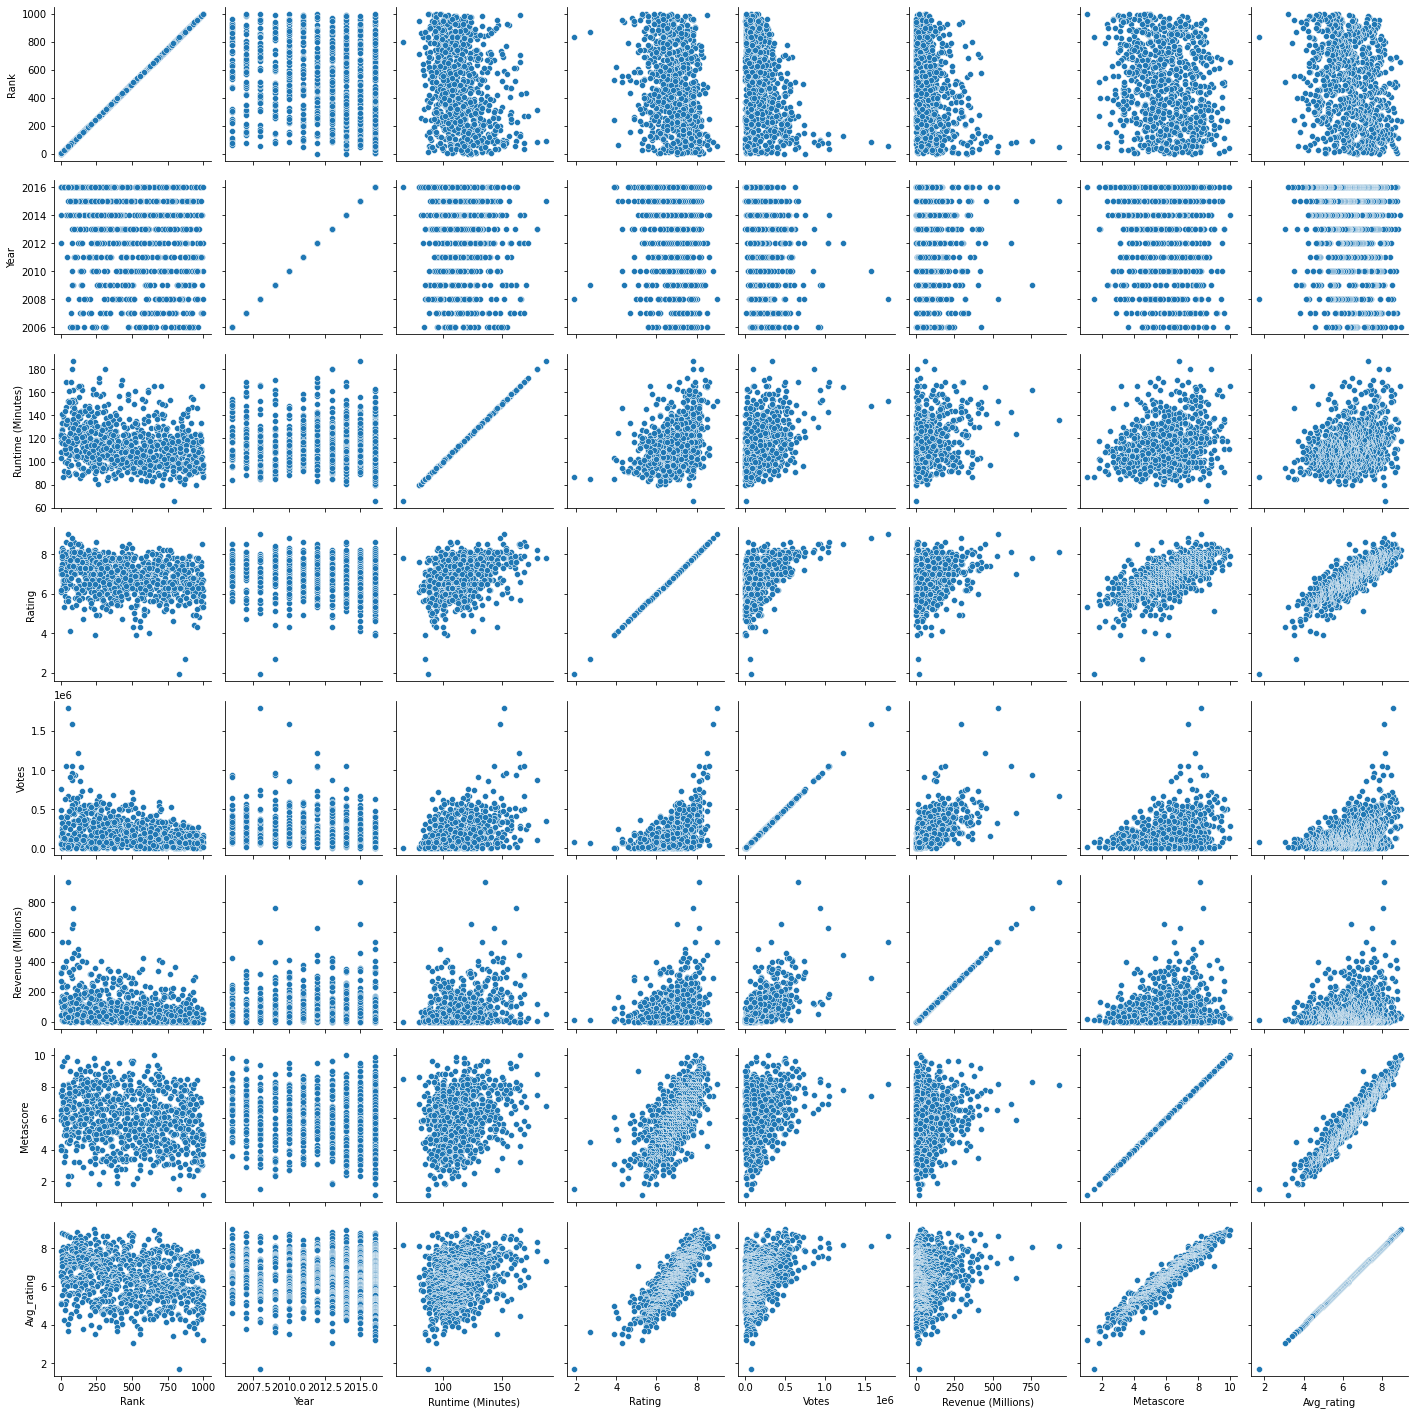

In [ ]:
#Create the scatter plot
p2 = sns.pairplot(new_data,
                   x_vars=numerical_cols,
                   y_vars=numerical_cols,
                   diag_kind=None) #diag_kind can be changed to see a different type of graph along the diagonal

**Observations:**
1.   We can identify how all features have provided insights 
2.   Mostly average ratings,votes & metascore points by the movies earned profits 



**Question: Identify trends on the Revenue and Rating ?**

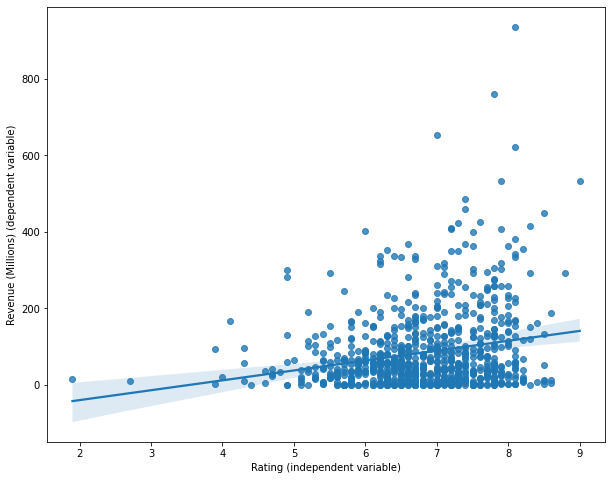

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10,8))

 #Create the scatter plot
 #Note that a higher confidence interval (ci) will result in a larger shaded area
p3 = sns.regplot(x="Rating",
                  y="Revenue (Millions)",
                  ci=99,
                  data=new_data)

 #Change the x- and y-axis labels
p3.set(xlabel='Rating (independent variable)',
        ylabel='Revenue (Millions) (dependent variable)');

**Observations**

1.   Rating  is plotted against Revenue  and the best fit line is shown.
2.    These variables seem to have a linear relationship, but as Revenue  increases rating seems to be slightly few for those movies 


 **Question:Group by director and get total turnover
Select top 20 directors by revenues** 


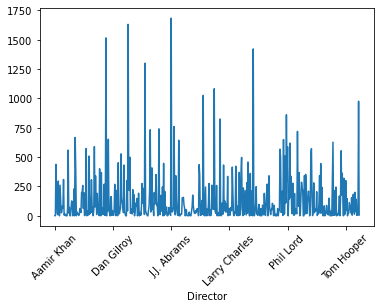

In [ ]:
df_gross = new_data.groupby('Director')['Revenue (Millions)'].sum()
df_gross.sort_values(ascending=False).head(20)
# df_gross.groupby(['Director']).size().plot(kind = "bar")
# plot the result
#sns.barplot(x = df_gross.index, y = df_gross.values)

df_gross.plot()
plt.xticks(rotation=45)
plt.show()

**Observations**
1.   Director J.J Abrams earned maximum 1683 Millions in Revenue
2.   Director Pierre earned minimum of 619.55 Millions in Revenue



 **Group by actors and get total turnover**
 
**Select top 20 actors by revenues**

In [ ]:
df_gross_actors = new_data.groupby('Actors')['Revenue (Millions)'].sum()
df_gross_actors.sort_values(ascending=False).head(20)

Actors
Daisy Ridley, John Boyega, Oscar Isaac, Domhnall Gleeson                      936.63
Sam Worthington, Zoe Saldana, Sigourney Weaver, Michelle Rodriguez            760.51
Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese Gibson                          720.84
Daniel Radcliffe, Emma Watson, Rupert Grint, Michael Gambon                   682.92
Chris Pratt, Bryce Dallas Howard, Ty Simpkins,Judy Greer                      652.18
Robert Downey Jr., Chris Evans, Scarlett Johansson,Jeremy Renner              623.28
Jennifer Lawrence, Josh Hutcherson, Liam Hemsworth, Woody Harrelson           618.77
Christian Bale, Heath Ledger, Aaron Eckhart,Michael Caine                     533.32
Felicity Jones, Diego Luna, Alan Tudyk, Donnie Yen                            532.17
Ellen DeGeneres, Albert Brooks,Ed O'Neill, Kaitlin Olson                      486.29
Robert Downey Jr., Chris Evans, Mark Ruffalo, Chris Hemsworth                 458.99
Christian Bale, Tom Hardy, Anne Hathaway,Gary Oldman      

**Observations**


Questions: Display the Frequency Distribution of Movies released each Year?

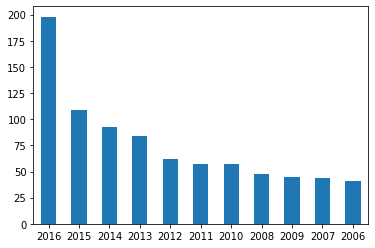

In [ ]:
gk = new_data.Year.value_counts()
#gk = new_data.groupby('Year')
#gk['Year'].value_counts()
gk
ax = gk.plot.bar(x='Year', y='Frequency', rot=0)

**Observations**
1.   Near to 200 movies were released in Year 2016 
2.   From 2013 we  have seen a gradual rise in the movies released


**Question**
1.   Display the Correlation between all  features using Heatmap for the IMDB data?


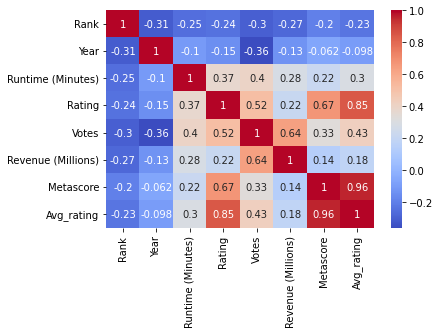

In [ ]:
sns.heatmap(new_data.corr(), cmap="coolwarm",annot=True)

**Observations:**
1.   Huge correlation between Metascore & rating 
2.   Year and Votes are also highly correlated 
3.   Revenue earned and votes are also correlated




**Actionable Insights**

1.   We can identify that num of movies released has increased each year 
2.   Analysis provide more insights that producing movies is profitable business
3.   More analysis is to be done on the Genre movies liked by the  voters
4.   An appropriate ‘Genre’ selection for directing the movies will help in earning more revenues 
